In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer



In [2]:

# Assuming the dataset is stored as a CSV file.
# Replace with your actual dataset file path.

# Upload the file


# Assuming the file is named 'your_dataset.xlsx'
df = pd.read_excel('Data.xlsx')

# Display the first few rows of the dataset
print(df.head())



  Country      Type of Ownership  Industry Sector  \
0  Sri Lanka       Local Investor        Services   
1        USA        Joint Venture        Services   
2     Norway     Foreign Investor   Manufacturing   
3  Sri Lanka       Local Investor   Manufacturing   
4  Sri Lanka       Local Investor   Manufacturing   

                         Size of Investment   Investment Description  \
0  Medium (10 USD million to 100 USD million)      5 years and above   
1            Small (Less than 10 USD million)      5 years and above   
2            Small (Less than 10 USD million)      5 years and above   
3  Medium (10 USD million to 100 USD million)      5 years and above   
4            Small (Less than 10 USD million)                3 years   

  Investment Years  Investor Facilitation Center  Environment  Engineering   \
0              25+                             5            5             4   
1         17 years                             3            4             3   
2          

In [3]:
df = df.drop(columns=['Investment Description', 'Investment Years'], axis = 1 )


In [5]:
df.columns = df.columns.str.strip().str.replace(r'\s+', ' ', regex=True)
print(df.columns)


Index(['Country', 'Type of Ownership', 'Industry Sector', 'Size of Investment',
       'Investor Facilitation Center', 'Environment', 'Engineering',
       'Investment approvals', 'External Line Agencies', 'Legal Activities',
       'Implementation Period', 'Issuing Tax Certificate', 'Import & Export',
       'Industrial Relations', 'Research and Policy', 'IT',
       'Zonal Infrastructure', 'Zonal Utility', 'Zonal Waste Management',
       'Zonal Security & Fire Facilities', 'Tax incentives to investors',
       'Government Policies', 'Ease of doing business', 'Skilled labor',
       'Satisfaction'],
      dtype='object')


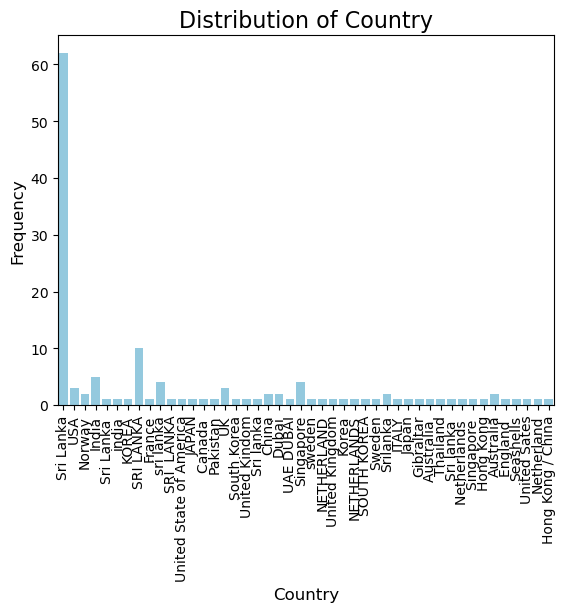

In [6]:
sns.countplot(data=df, x='Country', color='skyblue')

plt.title('Distribution of Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels if there are many countries
plt.show()

In [7]:
print(df['Country'].unique)

<bound method Series.unique of 0      Sri Lanka
1            USA
2         Norway
3      Sri Lanka
4      Sri Lanka
         ...    
130    Sri Lanka
131    Sri Lanka
132    Sri Lanka
133        Dubai
134          USA
Name: Country, Length: 135, dtype: object>


In [8]:
# Clean up the 'Country' column to standardize all instances of 'Sri Lanka'
df['Country'] = df['Country'].str.strip()  # Remove any leading/trailing spaces
df['Country'] = df['Country'].str.lower()  # Convert all text to lowercase

# Replace all variations of 'sri lanka' with the standard 'Sri Lanka'
df['Country'] = df['Country'].replace({
    'sri lanka': 'Sri Lanka',  # Standardize 'sri lanka' to 'Sri Lanka'
    'srilanka': 'Sri Lanka',
    'sri lanka ': 'Sri Lanka',  # In case there are extra spaces
    'sri lanka/': 'Sri Lanka',
    'sri lanka  ': 'Sri Lanka',
    'sri  lanka': 'Sri Lanka',
    'sri lanka?': 'Sri Lanka',
    '2584/08/10/2002': 'Sri Lanka',
    'united kindom' : 'united kingdom',
    'united state of america' : 'usa',
    'netherlands' : 'netherland',
    'united sates' : 'usa',
    'uk' : 'united kingdom',
    'dubai' : ' United Arab Emirates',
    'uae' : '',
    'hong kong / china' : 'china',
    
}, regex=True)

# After replacing, you can check the cleaned data
print(df['Country'].value_counts())


Country
Sri Lanka                 82
india                      6
singapore                  5
usa                        5
united kingdom             5
netherland                 4
australia                  3
china                      3
south korea                2
sweden                     2
 United Arab Emirates      2
japan                      2
korea                      2
norway                     2
pakistan                   1
canada                     1
  United Arab Emirates     1
france                     1
italy                      1
gibraltar                  1
thailand                   1
hong kong                  1
england                    1
seashells                  1
Name: count, dtype: int64


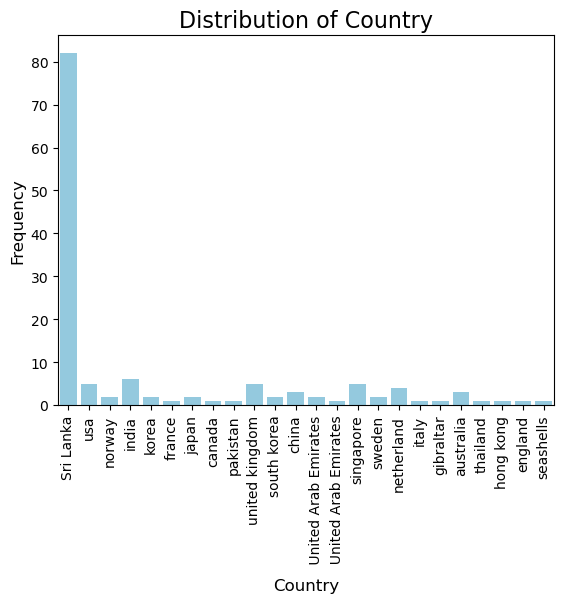

In [9]:
sns.countplot(data=df, x='Country', color='skyblue')

plt.title('Distribution of Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels if there are many countries
plt.show()

In [10]:
# Clean up the 'Country' column to standardize all instances of 'Sri Lanka'
#df['Satisfaction'] = df['Satisfaction'].str.strip()  # Remove any leading/trailing spaces
#df['Satisfaction'] = df['Satisfaction'].str.lower()  # Convert all text to lowercase

# Replace all variations of 'sri lanka' with the standard 'Sri Lanka'
df['Satisfaction'] = df['Satisfaction'].replace({
    1: 100,  # Standardize 'sri lanka' to 'Sri Lanka'

}, regex=True)

# After replacing, you can check the cleaned data
print(df['Satisfaction'].value_counts())


Satisfaction
80.0     20
50.0     19
90.0     19
60.0     17
75.0     13
70.0     12
100.0     9
65.0      4
95.0      4
40.0      3
85.0      2
55.0      2
45.0      1
98.0      1
99.0      1
86.0      1
51.0      1
67.0      1
88.0      1
Name: count, dtype: int64


In [11]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Country' column
df['Size of Investment_encoded'] = label_encoder.fit_transform(df['Size of Investment'])

# Display the first few rows of the dataframe to check the encoded column
print(df[['Size of Investment', 'Size of Investment_encoded']].head())

# Optional: Print the mapping of labels to country names
country_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label encoding mapping:", country_mapping)
df.head()

                           Size of Investment  Size of Investment_encoded
0  Medium (10 USD million to 100 USD million)                           1
1            Small (Less than 10 USD million)                           2
2            Small (Less than 10 USD million)                           2
3  Medium (10 USD million to 100 USD million)                           1
4            Small (Less than 10 USD million)                           2
Label encoding mapping: {'Large (Above 100 USD million)': 0, 'Medium (10 USD million to 100 USD million)': 1, 'Small (Less than 10 USD million)': 2}


,Country,Type of Ownership,Industry Sector,Size of Investment,Investor Facilitation Center,Environment,Engineering,Investment approvals,External Line Agencies,Legal Activities,...,Zonal Infrastructure,Zonal Utility,Zonal Waste Management,Zonal Security & Fire Facilities,Tax incentives to investors,Government Policies,Ease of doing business,Skilled labor,Satisfaction,Size of Investment_encoded
0,Sri Lanka,Local Investor,Services,Medium (10 USD million to 100 USD million),5,5,4,4,4,4,...,4.0,4.0,4.0,4.0,4,4,4,4,75.0,1
1,usa,Joint Venture,Services,Small (Less than 10 USD million),3,4,3,3,3,3,...,3.0,3.0,3.0,3.0,3,3,3,3,70.0,2
2,norway,Foreign Investor,Manufacturing,Small (Less than 10 USD million),3,3,3,3,3,3,...,3.0,3.0,3.0,4.0,3,3,3,3,70.0,2
3,Sri Lanka,Local Investor,Manufacturing,Medium (10 USD million to 100 USD million),4,4,5,5,4,4,...,4.0,3.0,4.0,3.0,3,3,3,3,50.0,1
4,Sri Lanka,Local Investor,Manufacturing,Small (Less than 10 USD million),3,3,3,4,4,3,...,3.0,3.0,3.0,3.0,3,3,3,3,45.0,2


In [12]:
from sklearn.impute import KNNImputer

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation on the entire dataframe
df[['Satisfaction']] = imputer.fit_transform(df[['Satisfaction']])



In [13]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns  # Select only numeric columns

# Initialize KNN Imputer
imputer = KNNImputer(n_neighbors=5)

# Apply imputer to numerical columns only
df[num_cols] = imputer.fit_transform(df[num_cols])

print(df)

                   Country Type of Ownership     Industry Sector  \
0                Sri Lanka    Local Investor            Services   
1                      usa     Joint Venture            Services   
2                   norway  Foreign Investor       Manufacturing   
3                Sri Lanka    Local Investor       Manufacturing   
4                Sri Lanka    Local Investor       Manufacturing   
..                     ...               ...                 ...   
130              Sri Lanka    Local Investor            Services   
131              Sri Lanka    Local Investor            Services   
132              Sri Lanka    Local Investor  Knowledge Services   
133   United Arab Emirates  Foreign Investor  Knowledge Services   
134                    usa  Foreign Investor       Manufacturing   

                             Size of Investment  Investor Facilitation Center  \
0    Medium (10 USD million to 100 USD million)                           5.0   
1              Small 

In [14]:
df[df.select_dtypes(include=['float']).columns] = df.select_dtypes(include=['float']).astype(int)

print(df)

                   Country Type of Ownership     Industry Sector  \
0                Sri Lanka    Local Investor            Services   
1                      usa     Joint Venture            Services   
2                   norway  Foreign Investor       Manufacturing   
3                Sri Lanka    Local Investor       Manufacturing   
4                Sri Lanka    Local Investor       Manufacturing   
..                     ...               ...                 ...   
130              Sri Lanka    Local Investor            Services   
131              Sri Lanka    Local Investor            Services   
132              Sri Lanka    Local Investor  Knowledge Services   
133   United Arab Emirates  Foreign Investor  Knowledge Services   
134                    usa  Foreign Investor       Manufacturing   

                             Size of Investment  Investor Facilitation Center  \
0    Medium (10 USD million to 100 USD million)                             5   
1              Small 

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Define save location
save_dir = r"C:\Users\DELL\Desktop\Research project\plots2"

# Ensure the directory exists
os.makedirs(save_dir, exist_ok=True)

ordinal_vars = [
    'Investor Facilitation Center', 'Environment', 'Engineering',
    'Investment approvals', 'External Line Agencies', 'Legal Activities',
    'Implementation Period', 'Issuing Tax Certificate', 'Import & Export',
    'Industrial Relations', 'Research and Policy', 'IT',
    'Zonal Infrastructure', 'Zonal Utility', 'Zonal Waste Management',
    'Zonal Security & Fire Facilities', 'Tax incentives to investors',
    'Government Policies', 'Ease of doing business', 'Skilled labor'
]

for var in ordinal_vars:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[var], y=df['Satisfaction'])
    plt.xlabel(var)
    plt.ylabel("Satisfaction")
    plt.title(f"Satisfaction vs {var}")
    plt.xticks(rotation=45)  # Rotate labels if needed
    
    # Save the plot
    save_path = os.path.join(save_dir, f"{var}_boxplot.png")
    plt.savefig(save_path, dpi=300, bbox_inches='tight')

    # Close the figure to free memory
    plt.close()

print("Plots saved successfully!")  


Plots saved successfully!


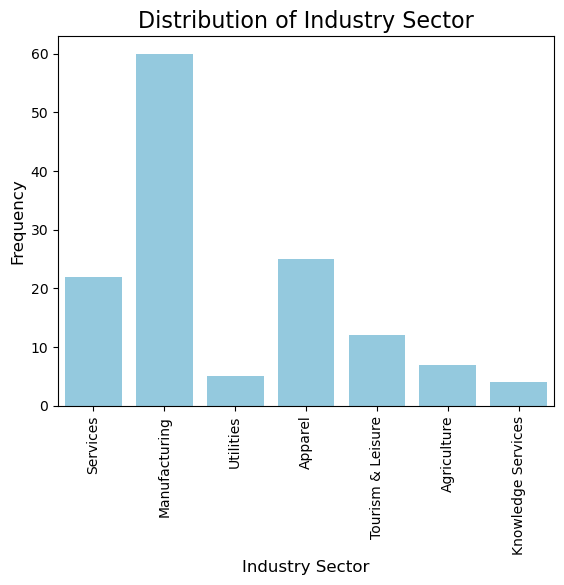

In [15]:
sns.countplot(data=df, x='Industry Sector', color='skyblue')

plt.title('Distribution of Industry Sector', fontsize=16)
plt.xlabel('Industry Sector', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels if there are many countries
plt.show()

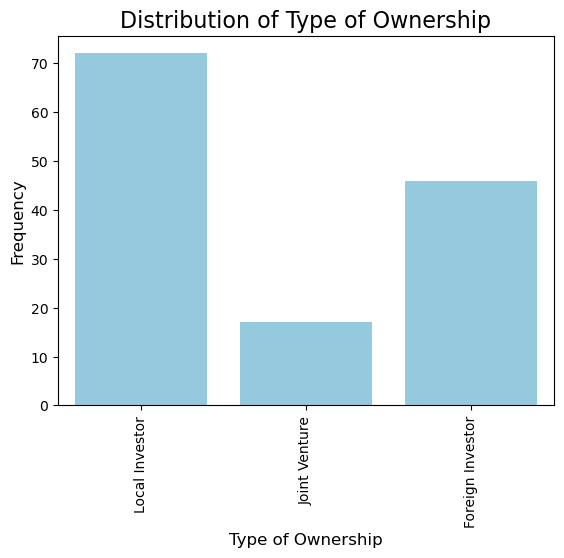

In [16]:
sns.countplot(data=df, x='Type of Ownership', color='skyblue')

plt.title('Distribution of Type of Ownership', fontsize=16)
plt.xlabel('Type of Ownership', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels if there are many countries
plt.show()

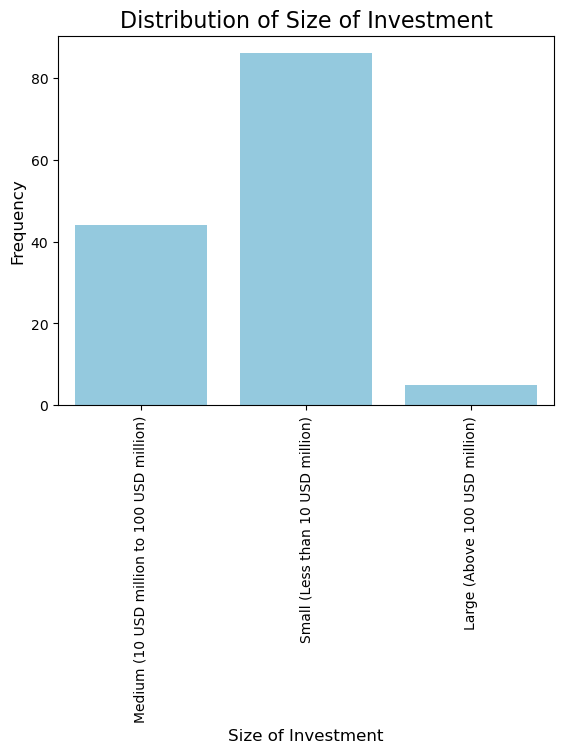

In [17]:

sns.countplot(data=df, x='Size of Investment', color='skyblue')

plt.title('Distribution of Size of Investment', fontsize=16)
plt.xlabel('Size of Investment', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels if there are many countries
plt.show()

In [282]:
import pandas as pd
import numpy as np
from scipy import stats

# Function to check normality for each group using Shapiro-Wilk test
def check_normality(df, group_col, value_col):
    # Group the data by the group column
    grouped_data = df.groupby(group_col)[value_col].apply(list)
    
    normality_results = {}
    for group, values in grouped_data.items():
        # Shapiro-Wilk test for normality
        stat, p_value = stats.shapiro(values)
        normality_results[group] = {'Shapiro-Wilk Stat': stat, 'p-value': p_value}
        
        if p_value > 0.05:
            normality_results[group]['Normality'] = 'Normal'
        else:
            normality_results[group]['Normality'] = 'Not Normal'
    
    return normality_results

import pandas as pd
import scipy.stats as stats

def check_normality_with_encoding(df, categorical_col, numerical_col):
    # One-hot encoding for categorical variable
    df_encoded = pd.get_dummies(df, columns=[categorical_col], dtype=int)

    normality_results = {}

    for col in df_encoded.columns:
        if col.startswith(categorical_col + "_"):  # Only check one-hot encoded columns
            values = df[numerical_col][df_encoded[col] == 1]  # Select corresponding rows
            
            if len(values) > 3:  # Shapiro-Wilk needs at least 3 values
                stat, p_value = stats.shapiro(values)
                normality_results[col] = {'Shapiro-Wilk Stat': stat, 'p-value': p_value}
                
                normality_results[col]['Normality'] = 'Normal' if p_value > 0.05 else 'Not Normal'
    
    return normality_results



# Function to check if the distributions are the same across groups (using ANOVA or Kruskal-Wallis)
import pandas as pd
import numpy as np
from scipy import stats

def perform_anova(df, group_col, value_col):
    # Group the data by the group column and extract values
    grouped_data = df.groupby(group_col)[value_col].apply(list)
    values_list = [values for group, values in grouped_data.items()]

    # Perform ANOVA test (F-statistic and p-value)
    f_stat, p_value = stats.f_oneway(*values_list)

    # Return the results
    return {'ANOVA F-statistic': f_stat, 'p-value': p_value}


def perform_kruskal_wallis(df, group_col, value_col):
    # Group the data by the group column and extract values
    grouped_data = df.groupby(group_col)[value_col].apply(list)
    
    # Check if there are any groups with less than 2 data points
    for group, values in grouped_data.items():
        if len(values) < 2:
            return {'Error': f"Group '{group}' has less than 2 data points. Kruskal-Wallis test cannot be performed."}

    # Check for NaN or infinite values in the value column
    if df[value_col].isna().sum() > 0 or (df[value_col] == float('inf')).sum() > 0 or (df[value_col] == float('-inf')).sum() > 0:
        return {'Error': 'The value column contains NaN or infinite values. Please clean the data before performing the test.'}

    # Create the list of values for Kruskal-Wallis test
    values_list = [values for group, values in grouped_data.items()]

    # Perform Kruskal-Wallis test (H-statistic and p-value)
    h_stat, p_value = stats.kruskal(*values_list)

    # Determine if the p-value is statistically significant
    if p_value < 0.20:
        significance = "statistically significant"
    else:
        significance = "not statistically significant"

    # Return the results
    return {
        'Kruskal-Wallis H-statistic': h_stat,
        'p-value': p_value,
        'Significance': significance
    }


import pandas as pd
import scipy.stats as stats

def kruskal_wallis_with_encoding(df, categorical_col, numerical_col):
    # One-hot encoding for categorical variable
    df_encoded = pd.get_dummies(df, columns=[categorical_col], dtype=int)

    kw_results = {}

    groups = []  # List to store numerical values for each category

    for col in df_encoded.columns:
        if col.startswith(categorical_col + "_"):  # Only check one-hot encoded columns
            values = df[numerical_col][df_encoded[col] == 1]  # Select corresponding rows
            
            if len(values) > 3:  # Kruskal-Wallis needs at least 3 values per group
                groups.append(values)
    
    if len(groups) > 1:  # Kruskal-Wallis requires at least 2 groups
        stat, p_value = stats.kruskal(*groups)
        kw_results['Kruskal-Wallis Stat'] = stat
        kw_results['p-value'] = p_value
        kw_results['Significant'] = 'Yes' if p_value < 0.20 else 'No'
    else:
        kw_results['Error'] = 'Not enough groups with sufficient data for Kruskal-Wallis test'

    return kw_results


In [283]:
# Call the function with correct column names as strings

normality = check_normality_with_encoding( df,'Type of Ownership','Satisfaction')

# Display the results
print("Normality Test Results:")
print(normality)



Normality Test Results:
{'Type of Ownership_Foreign Investor': {'Shapiro-Wilk Stat': 0.9336002469062805, 'p-value': 0.011371554806828499, 'Normality': 'Not Normal'}, 'Type of Ownership_Joint Venture': {'Shapiro-Wilk Stat': 0.9383651614189148, 'p-value': 0.29930970072746277, 'Normality': 'Normal'}, 'Type of Ownership_Local Investor': {'Shapiro-Wilk Stat': 0.9472974538803101, 'p-value': 0.004486999474465847, 'Normality': 'Not Normal'}}


In [284]:
kruskal_result = kruskal_wallis_with_encoding(df, 'Type of Ownership', 'Satisfaction')

# Output the result
print("Kruskal-Wallis Test Result:", kruskal_result)


Kruskal-Wallis Test Result: {'Kruskal-Wallis Stat': 1.1563467153410667, 'p-value': 0.5609220352756356, 'Significant': 'No'}


In [285]:

#Data must be at least length 3. there fore check normality by
normality = check_normality_with_encoding(df, 'Industry Sector', 'Satisfaction')

# Display the results
print("Normality Test Results:")
print(normality)

Normality Test Results:
{'Industry Sector_Agriculture': {'Shapiro-Wilk Stat': 0.8942227363586426, 'p-value': 0.29742226004600525, 'Normality': 'Normal'}, 'Industry Sector_Apparel': {'Shapiro-Wilk Stat': 0.8857088685035706, 'p-value': 0.009082530625164509, 'Normality': 'Not Normal'}, 'Industry Sector_Knowledge Services': {'Shapiro-Wilk Stat': 0.728634238243103, 'p-value': 0.02385682798922062, 'Normality': 'Not Normal'}, 'Industry Sector_Manufacturing': {'Shapiro-Wilk Stat': 0.9448713660240173, 'p-value': 0.009000188671052456, 'Normality': 'Not Normal'}, 'Industry Sector_Services': {'Shapiro-Wilk Stat': 0.9593930244445801, 'p-value': 0.47710731625556946, 'Normality': 'Normal'}, 'Industry Sector_Tourism & Leisure': {'Shapiro-Wilk Stat': 0.9433265328407288, 'p-value': 0.5423291325569153, 'Normality': 'Normal'}, 'Industry Sector_Utilities': {'Shapiro-Wilk Stat': 0.8362391591072083, 'p-value': 0.15479186177253723, 'Normality': 'Normal'}}


In [286]:
kruskal_result = kruskal_wallis_with_encoding(df, 'Industry Sector', 'Satisfaction')

# Output the result
print("Kruskal-Wallis Test Result:", kruskal_result)

Kruskal-Wallis Test Result: {'Kruskal-Wallis Stat': 3.13093219629912, 'p-value': 0.7922431953263548, 'Significant': 'No'}


In [287]:
normality = check_normality(df, 'Size of Investment', 'Satisfaction')

# Display the results
print("Normality Test Results:")
print(normality)

Normality Test Results:
{'Large (Above 100 USD million)': {'Shapiro-Wilk Stat': 0.894454300403595, 'p-value': 0.37999773025512695, 'Normality': 'Normal'}, 'Medium (10 USD million to 100 USD million)': {'Shapiro-Wilk Stat': 0.9503769278526306, 'p-value': 0.05682772397994995, 'Normality': 'Normal'}, 'Small (Less than 10 USD million)': {'Shapiro-Wilk Stat': 0.9485112428665161, 'p-value': 0.0018166352529078722, 'Normality': 'Not Normal'}}


In [288]:
kruskal_result = perform_kruskal_wallis(df, 'Size of Investment_encoded', 'Satisfaction')

# Output the result
print("Kruskal-Wallis Test Result:", kruskal_result)

Kruskal-Wallis Test Result: {'Kruskal-Wallis H-statistic': 1.680089624771554, 'p-value': 0.431691177884023, 'Significance': 'not statistically significant'}


In [289]:
#Data must be at least length 3. there fore check normality by
normality = check_normality_with_encoding(df, 'Country', 'Satisfaction')

# Display the results
print("Normality Test Results:")
print(normality)

Normality Test Results:
{'Country_Sri Lanka': {'Shapiro-Wilk Stat': 0.9557144641876221, 'p-value': 0.006497839465737343, 'Normality': 'Not Normal'}, 'Country_india': {'Shapiro-Wilk Stat': 0.9556125998497009, 'p-value': 0.7853703498840332, 'Normality': 'Normal'}, 'Country_netherland': {'Shapiro-Wilk Stat': 0.9786528944969177, 'p-value': 0.8940738439559937, 'Normality': 'Normal'}, 'Country_singapore': {'Shapiro-Wilk Stat': 0.8822141885757446, 'p-value': 0.3194655179977417, 'Normality': 'Normal'}, 'Country_united kingdom': {'Shapiro-Wilk Stat': 0.8015674352645874, 'p-value': 0.08344810456037521, 'Normality': 'Normal'}, 'Country_usa': {'Shapiro-Wilk Stat': 0.8939244747161865, 'p-value': 0.3772224485874176, 'Normality': 'Normal'}}


In [290]:
kruskal_result = kruskal_wallis_with_encoding(df, 'Country', 'Satisfaction')

# Output the result
print("Kruskal-Wallis Test Result:", kruskal_result)

Kruskal-Wallis Test Result: {'Kruskal-Wallis Stat': 2.437396942695371, 'p-value': 0.7858922767598588, 'Significant': 'No'}


In [291]:
from scipy.stats import shapiro

stat, p = shapiro(df['Satisfaction'])
print(f"Shapiro-Wilk test p-value: {p}")

if p > 0.05:
    print("✅ Numerical variable is normally distributed.")
else:
    print("❌ Numerical variable is NOT normally distributed.")


Shapiro-Wilk test p-value: 0.00011182179878233
❌ Numerical variable is NOT normally distributed.


In [292]:
kruskal_result = perform_kruskal_wallis(df, 'Investor Facilitation Center', 'Satisfaction')

# Output the result
print("Kruskal-Wallis Test Result:", kruskal_result)

Kruskal-Wallis Test Result: {'Kruskal-Wallis H-statistic': 30.454777453731126, 'p-value': 2.436851711720649e-07, 'Significance': 'statistically significant'}


In [293]:
normality = check_normality(df, 'Environment', 'Satisfaction')

# Display the results
print("Normality Test Results:")
print(normality)

Normality Test Results:
{3: {'Shapiro-Wilk Stat': 0.9463413953781128, 'p-value': 0.08747478574514389, 'Normality': 'Normal'}, 4: {'Shapiro-Wilk Stat': 0.9191848039627075, 'p-value': 0.0024755015037953854, 'Normality': 'Not Normal'}, 5: {'Shapiro-Wilk Stat': 0.8997005820274353, 'p-value': 0.0004110063018742949, 'Normality': 'Not Normal'}}


In [294]:
kruskal_result = perform_kruskal_wallis(df, 'Environment', 'Satisfaction')

# Output the result
print("Kruskal-Wallis Test Result:", kruskal_result)

Kruskal-Wallis Test Result: {'Kruskal-Wallis H-statistic': 29.929426145668288, 'p-value': 3.1688938320878416e-07, 'Significance': 'statistically significant'}


In [295]:
normality = check_normality(df, 'Engineering', 'Satisfaction')

# Display the results
print("Normality Test Results:")
print(normality)

Normality Test Results:
{3: {'Shapiro-Wilk Stat': 0.9568514227867126, 'p-value': 0.13060139119625092, 'Normality': 'Normal'}, 4: {'Shapiro-Wilk Stat': 0.94073486328125, 'p-value': 0.011997135356068611, 'Normality': 'Not Normal'}, 5: {'Shapiro-Wilk Stat': 0.8582587242126465, 'p-value': 8.482366683892906e-05, 'Normality': 'Not Normal'}}


In [296]:
kruskal_result = perform_kruskal_wallis(df, 'Engineering', 'Satisfaction')

# Output the result
print("Kruskal-Wallis Test Result:", kruskal_result)

Kruskal-Wallis Test Result: {'Kruskal-Wallis H-statistic': 33.67883072879023, 'p-value': 4.86110306155452e-08, 'Significance': 'statistically significant'}


In [297]:
kruskal_result = perform_kruskal_wallis(df, 'Investment approvals', 'Satisfaction')

# Output the result
print("Kruskal-Wallis Test Result:", kruskal_result)

Kruskal-Wallis Test Result: {'Kruskal-Wallis H-statistic': 37.08848676775672, 'p-value': 8.837662804557937e-09, 'Significance': 'statistically significant'}


In [298]:
kruskal_result = perform_kruskal_wallis(df, 'External Line Agencies', 'Satisfaction')

# Output the result
print("Kruskal-Wallis Test Result:", kruskal_result)

Kruskal-Wallis Test Result: {'Kruskal-Wallis H-statistic': 43.086575634027064, 'p-value': 4.404219738950614e-10, 'Significance': 'statistically significant'}


In [299]:
kruskal_result = perform_kruskal_wallis(df, 'Legal Activities', 'Satisfaction')

# Output the result
print("Kruskal-Wallis Test Result:", kruskal_result)

Kruskal-Wallis Test Result: {'Kruskal-Wallis H-statistic': 36.02754712515899, 'p-value': 1.5021646703285295e-08, 'Significance': 'statistically significant'}


In [300]:
kruskal_result = perform_kruskal_wallis(df, 'Implementation Period', 'Satisfaction')

# Output the result
print("Kruskal-Wallis Test Result:", kruskal_result)

Kruskal-Wallis Test Result: {'Kruskal-Wallis H-statistic': 28.223706944953335, 'p-value': 7.435324162430941e-07, 'Significance': 'statistically significant'}


In [301]:
kruskal_result = perform_kruskal_wallis(df, 'Issuing Tax Certificate', 'Satisfaction')

# Output the result
print("Kruskal-Wallis Test Result:", kruskal_result)

Kruskal-Wallis Test Result: {'Kruskal-Wallis H-statistic': 24.07526982746532, 'p-value': 5.9172726648199914e-06, 'Significance': 'statistically significant'}


In [302]:
kruskal_result = perform_kruskal_wallis(df, 'Import & Export', 'Satisfaction')

# Output the result
print("Kruskal-Wallis Test Result:", kruskal_result)

Kruskal-Wallis Test Result: {'Kruskal-Wallis H-statistic': 29.369295405094135, 'p-value': 4.193131998651135e-07, 'Significance': 'statistically significant'}


In [303]:
kruskal_result = perform_kruskal_wallis(df, 'Industrial Relations', 'Satisfaction')

# Output the result
print("Kruskal-Wallis Test Result:", kruskal_result)

Kruskal-Wallis Test Result: {'Kruskal-Wallis H-statistic': 27.56222742601177, 'p-value': 1.0349952578903573e-06, 'Significance': 'statistically significant'}


In [304]:
kruskal_result = perform_kruskal_wallis(df, 'Research and Policy', 'Satisfaction')

# Output the result
print("Kruskal-Wallis Test Result:", kruskal_result)

Kruskal-Wallis Test Result: {'Kruskal-Wallis H-statistic': 41.55014828017234, 'p-value': 9.49510867649936e-10, 'Significance': 'statistically significant'}


In [305]:
kruskal_result = perform_kruskal_wallis(df, 'IT', 'Satisfaction')

# Output the result
print("Kruskal-Wallis Test Result:", kruskal_result)

Kruskal-Wallis Test Result: {'Kruskal-Wallis H-statistic': 41.92537755255749, 'p-value': 7.870819240636112e-10, 'Significance': 'statistically significant'}


In [306]:
kruskal_result = perform_kruskal_wallis(df, 'Zonal Infrastructure', 'Satisfaction')

# Output the result
print("Kruskal-Wallis Test Result:", kruskal_result)

Kruskal-Wallis Test Result: {'Kruskal-Wallis H-statistic': 33.02186936186668, 'p-value': 6.751374157264172e-08, 'Significance': 'statistically significant'}


In [307]:
kruskal_result = perform_kruskal_wallis(df, 'Zonal Utility', 'Satisfaction')

# Output the result
print("Kruskal-Wallis Test Result:", kruskal_result)

Kruskal-Wallis Test Result: {'Kruskal-Wallis H-statistic': 34.78514579791186, 'p-value': 2.7957707950623122e-08, 'Significance': 'statistically significant'}


In [308]:
kruskal_result = perform_kruskal_wallis(df, 'Zonal Waste Management', 'Satisfaction')

# Output the result
print("Kruskal-Wallis Test Result:", kruskal_result)

Kruskal-Wallis Test Result: {'Kruskal-Wallis H-statistic': 31.67745877222751, 'p-value': 1.3222915641018976e-07, 'Significance': 'statistically significant'}


In [309]:
kruskal_result = perform_kruskal_wallis(df, 'Zonal Security & Fire Facilities', 'Satisfaction')

# Output the result
print("Kruskal-Wallis Test Result:", kruskal_result)

Kruskal-Wallis Test Result: {'Kruskal-Wallis H-statistic': 31.157309616658797, 'p-value': 1.7150476125098026e-07, 'Significance': 'statistically significant'}


In [310]:
kruskal_result = perform_kruskal_wallis(df, 'Tax incentives to investors', 'Satisfaction')

# Output the result
print("Kruskal-Wallis Test Result:", kruskal_result)

Kruskal-Wallis Test Result: {'Kruskal-Wallis H-statistic': 44.74405218459591, 'p-value': 1.9228814911537838e-10, 'Significance': 'statistically significant'}


In [311]:
kruskal_result = perform_kruskal_wallis(df, 'Government Policies', 'Satisfaction')

# Output the result
print("Kruskal-Wallis Test Result:", kruskal_result)

Kruskal-Wallis Test Result: {'Kruskal-Wallis H-statistic': 41.32137191475305, 'p-value': 1.064579493673609e-09, 'Significance': 'statistically significant'}


In [312]:
kruskal_result = perform_kruskal_wallis(df, 'Ease of doing business', 'Satisfaction')

# Output the result
print("Kruskal-Wallis Test Result:", kruskal_result)

Kruskal-Wallis Test Result: {'Kruskal-Wallis H-statistic': 39.26683248462778, 'p-value': 2.9738267594181917e-09, 'Significance': 'statistically significant'}


In [313]:
kruskal_result = perform_kruskal_wallis(df, 'Skilled labor', 'Satisfaction')

# Output the result
print("Kruskal-Wallis Test Result:", kruskal_result)

Kruskal-Wallis Test Result: {'Kruskal-Wallis H-statistic': 34.70079154053702, 'p-value': 2.916210424803176e-08, 'Significance': 'statistically significant'}


In [314]:
import numpy as np

# Check for NaN values
print(df.isna().sum())



Country                             0
Type of Ownership                   0
Industry Sector                     0
Size of Investment                  0
Investor Facilitation Center        0
Environment                         0
Engineering                         0
Investment approvals                0
External Line Agencies              0
Legal Activities                    0
Implementation Period               0
Issuing Tax Certificate             0
Import & Export                     0
Industrial Relations                0
Research and Policy                 0
IT                                  0
Zonal Infrastructure                0
Zonal Utility                       0
Zonal Waste Management              0
Zonal Security & Fire Facilities    0
Tax incentives to investors         0
Government Policies                 0
Ease of doing business              0
Skilled labor                       0
Satisfaction                        0
Size of Investment_encoded          0
dtype: int64

In [315]:
print(df['Satisfaction'].isna().sum())  # Check for NaNs
print(np.isinf(df['Satisfaction']).sum())  # Check for infinite values



0
0


In [316]:
df = df.drop(columns=['Type of Ownership', 'Country', 'Industry Sector', 'Size of Investment', 'Size of Investment_encoded'], axis = 1 )


In [317]:
df = df.drop('Zonal Security & Fire Facilities',axis = 1)

In [318]:
print(df.columns)

Index(['Investor Facilitation Center', 'Environment', 'Engineering',
       'Investment approvals', 'External Line Agencies', 'Legal Activities',
       'Implementation Period', 'Issuing Tax Certificate', 'Import & Export',
       'Industrial Relations', 'Research and Policy', 'IT',
       'Zonal Infrastructure', 'Zonal Utility', 'Zonal Waste Management',
       'Tax incentives to investors', 'Government Policies',
       'Ease of doing business', 'Skilled labor', 'Satisfaction'],
      dtype='object')


In [319]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Define the features (X) and target (y)
X = df.drop('Satisfaction', axis=1)  # Drop the 'Satisfaction' column
y = df['Satisfaction']  # Target variable

# Initialize the imputer (e.g., fill NaN values with the mean of each column)
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'
X_imputed = imputer.fit_transform(X)

# Convert the imputed X back to a DataFrame and keep the original column names
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

# Impute missing values for the target (y)
imputer = SimpleImputer(strategy='most_frequent')
y = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()  # Use ravel() to flatten array

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the transformation function



In [320]:
print("Number of features in X_train:", X_train.shape[1])



Number of features in X_train: 19


In [321]:
# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model
print("Linear Regression Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")


Linear Regression Performance:
Mean Absolute Error: 10.052812018558214
Mean Squared Error: 166.5296747491211
R-squared: 0.4621267992941672


In [322]:
# Initialize the Decision Tree model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = decision_tree_model.predict(X_test)

# Evaluate the model
print("Decision Tree Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_tree)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_tree)}")
print(f"R-squared: {r2_score(y_test, y_pred_tree)}")


Decision Tree Performance:
Mean Absolute Error: 14.740740740740739
Mean Squared Error: 433.30100874368947
R-squared: -0.3995163372122319


In [323]:
# Initialize the Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = random_forest_model.predict(X_test)
y_train_pred_rf = random_forest_model.predict(X_train)
# Evaluate the model
print("Random Forest Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"Test Error: {mean_squared_error(y_test, y_pred_rf)}")
print(f"Train Error: {mean_squared_error(y_train, y_train_pred_rf)}")
print(f"R-squared: {r2_score(y_test, y_pred_rf)}")


Random Forest Performance:
Mean Absolute Error: 11.200169752058644
Test Error: 208.2180606971886
Train Error: 55.08844187377358
R-squared: 0.32747773079674947


In [324]:
import xgboost as xgb

xgboost_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Train the model
xgboost_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgboost_model.predict(X_test)
test_error = mean_squared_error(y_test,y_pred_xgb)

# Evaluate the model
print("XGBoost Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_xgb)}")
print(f"Test Error: {mean_squared_error(y_test, y_pred_xgb)}")
print(f"R-squared: {r2_score(y_test, y_pred_xgb)}")

XGBoost Performance:
Mean Absolute Error: 13.099474906921387
Test Error: 321.6461181640625
R-squared: -0.03888285160064697


In [325]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the KNN regressor
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)
y_train_pred_knn = knn_model.predict(X_train)

# Evaluate the model
print("KNN Regressor Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_knn)}")
print(f"Test Error: {mean_squared_error(y_test, y_pred_knn)}")
print(f"Train Error: {mean_squared_error(y_train, y_train_pred_knn)}")
print(f"R-squared: {r2_score(y_test, y_pred_knn)}")


KNN Regressor Performance:
Mean Absolute Error: 10.096296296296297
Test Error: 165.82666666666668
Train Error: 133.0062962962963
R-squared: 0.46439744089604085


In [326]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

print("SVR Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_svr)}")
print(f"Test Error (MSE): {mean_squared_error(y_test, y_pred_svr)}")
print(f"R-squared: {r2_score(y_test, y_pred_svr)}")


SVR Performance:
Mean Absolute Error: 11.483409668333058
Test Error (MSE): 201.08176728699894
R-squared: 0.35052720221076183


In [327]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("Gradient Boosting Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_gb)}")
print(f"Test Error (MSE): {mean_squared_error(y_test, y_pred_gb)}")
print(f"R-squared: {r2_score(y_test, y_pred_gb)}")


Gradient Boosting Performance:
Mean Absolute Error: 12.718200042804357
Test Error (MSE): 267.10146868384663
R-squared: 0.13729056343474577


In [328]:
from sklearn.ensemble import AdaBoostRegressor

ab_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ab_model.fit(X_train, y_train)
y_pred_ab = ab_model.predict(X_test)

print("AdaBoost Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_ab)}")
print(f"Test Error (MSE): {mean_squared_error(y_test, y_pred_ab)}")
print(f"R-squared: {r2_score(y_test, y_pred_ab)}")


AdaBoost Performance:
Mean Absolute Error: 10.048891003714292
Test Error (MSE): 145.87224227498592
R-squared: 0.5288481169209907


In [329]:
from sklearn.ensemble import ExtraTreesRegressor

et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_model.fit(X_train, y_train)
y_pred_et = et_model.predict(X_test)

print("Extra Trees Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_et)}")
print(f"Test Error (MSE): {mean_squared_error(y_test, y_pred_et)}")
print(f"R-squared: {r2_score(y_test, y_pred_et)}")


Extra Trees Performance:
Mean Absolute Error: 12.506490299823634
Test Error (MSE): 286.08913077274826
R-squared: 0.0759624271907744


In [330]:
print(df.columns)

Index(['Investor Facilitation Center', 'Environment', 'Engineering',
       'Investment approvals', 'External Line Agencies', 'Legal Activities',
       'Implementation Period', 'Issuing Tax Certificate', 'Import & Export',
       'Industrial Relations', 'Research and Policy', 'IT',
       'Zonal Infrastructure', 'Zonal Utility', 'Zonal Waste Management',
       'Tax incentives to investors', 'Government Policies',
       'Ease of doing business', 'Skilled labor', 'Satisfaction'],
      dtype='object')


In [331]:
selected_columns = ['Investor Facilitation Center', 'Environment', 'Engineering',
       'Investment approvals', 'External Line Agencies', 'Legal Activities',
       'Implementation Period', 'Issuing Tax Certificate', 'Import & Export',
       'Industrial Relations', 'Research and Policy', 'IT',
       'Zonal Infrastructure', 'Zonal Utility', 'Zonal Waste Management',
       'Tax incentives to investors', 'Government Policies',
       'Ease of doing business', 'Skilled labor']

In [332]:
import optuna
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Load your data here
# df = pd.read_csv('your_data.csv')

# Define the features (X) and target (y)
X = df.drop('Satisfaction', axis=1)  # Replace 'Satisfaction' with the name of your target column
y = df['Satisfaction']

# Step 1: Scale the Features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Define the objective function for Optuna
def objective(trial):
    # Define the hyperparameter search space
    params = {
        'n_neighbors': trial.suggest_int('n_neighbors', 1, 20),  # Number of neighbors
        'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),  # Weight function
        'p': trial.suggest_int('p', 1, 2),  # Power parameter for the Minkowski distance metric
        'leaf_size': trial.suggest_int('leaf_size', 10, 50),  # Leaf size for KDTree or BallTree
    }

    # Initialize the KNN regressor with the selected parameters
    model = KNeighborsRegressor(**params)
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Predict on the test set
    preds = model.predict(X_test)
    
    # Return the R-squared score
    return r2_score(y_test, preds)

# Step 4: Create an Optuna study for maximizing the R-squared score
study = optuna.create_study(direction='maximize')

# Optimize the study for 20 trials
study.optimize(objective, n_trials=20)

# Output the best parameters found
print("Best Parameters:", study.best_params)

# Step 5: Retrain the model with the best hyperparameters found
best_knn = KNeighborsRegressor(**study.best_params)

# Fit the model on the training data
best_knn.fit(X_train, y_train)

# Step 6: Predict on the test set
y_pred = best_knn.predict(X_test)

# Step 7: Evaluate the model performance
print("Final Model Performance:")
print(f"R-squared: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")

# Step 8: Perform Cross-Validation for a more robust evaluation
cv_scores = cross_val_score(best_knn, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validated R-squared scores: {cv_scores}")
print(f"Mean cross-validated R-squared: {cv_scores.mean()}")


[I 2025-03-05 15:37:38,305] A new study created in memory with name: no-name-610d8396-425c-485d-9910-c763660ae8e5
[I 2025-03-05 15:37:38,373] Trial 0 finished with value: 0.3416878501541679 and parameters: {'n_neighbors': 17, 'weights': 'distance', 'p': 2, 'leaf_size': 23}. Best is trial 0 with value: 0.3416878501541679.
[I 2025-03-05 15:37:38,389] Trial 1 finished with value: 0.3161596604402227 and parameters: {'n_neighbors': 4, 'weights': 'uniform', 'p': 1, 'leaf_size': 49}. Best is trial 0 with value: 0.3416878501541679.
[I 2025-03-05 15:37:38,405] Trial 2 finished with value: 0.48568589834473486 and parameters: {'n_neighbors': 6, 'weights': 'uniform', 'p': 1, 'leaf_size': 32}. Best is trial 2 with value: 0.48568589834473486.
[I 2025-03-05 15:37:38,422] Trial 3 finished with value: 0.33263284377930136 and parameters: {'n_neighbors': 16, 'weights': 'distance', 'p': 1, 'leaf_size': 18}. Best is trial 2 with value: 0.48568589834473486.
[I 2025-03-05 15:37:38,443] Trial 4 finished with 

Best Parameters: {'n_neighbors': 18, 'weights': 'uniform', 'p': 1, 'leaf_size': 19}
Final Model Performance:
R-squared: 0.5167287686527489
Mean Absolute Error: 9.948559670781894
Mean Squared Error: 149.62448559670779
Cross-validated R-squared scores: [ 0.33883051  0.35557572  0.2243376   0.29088625 -0.09515633]
Mean cross-validated R-squared: 0.22289475195651973


In [333]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

# Initialize the AdaBoostRegressor
ada_model = AdaBoostRegressor(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'loss': ['linear', 'square']
}




# Perform RandomizedSearchCV
ada_random = RandomizedSearchCV(ada_model, param_grid, n_iter=20, cv=5, scoring='r2', random_state=42, n_jobs=-1)
ada_random.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", ada_random.best_params_)


C:\Users\DELL\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'n_estimators': 100, 'loss': 'square', 'learning_rate': 0.05}


In [334]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Retrain the model with the best hyperparameters found
best_ada = AdaBoostRegressor(**ada_random.best_params_)  # Use the best parameters found from RandomizedSearchCV

# Fit the model on the training data
best_ada.fit(X_train, y_train)

# Predict on the test and train sets
y_pred_ada_test = best_ada.predict(X_test)
y_pred_ada_train = best_ada.predict(X_train)

# Evaluate the model performance on test data
print("Final Model Performance on Test Data:")
print(f"Test R-squared: {r2_score(y_test, y_pred_ada_test)}")
print(f"Test Mean Absolute Error: {mean_absolute_error(y_test, y_pred_ada_test)}")
print(f"Test Mean Squared Error: {mean_squared_error(y_test, y_pred_ada_test)}")

# Evaluate the model performance on train data
print("\nFinal Model Performance on Train Data:")
print(f"Train R-squared: {r2_score(y_train, y_pred_ada_train)}")
print(f"Train Mean Absolute Error: {mean_absolute_error(y_train, y_pred_ada_train)}")
print(f"Train Mean Squared Error: {mean_squared_error(y_train, y_pred_ada_train)}")


Final Model Performance on Test Data:
Test R-squared: 0.49301458809227416
Test Mean Absolute Error: 10.219594810396881
Test Mean Squared Error: 156.96657806477555

Final Model Performance on Train Data:
Train R-squared: 0.5605095841097867
Train Mean Absolute Error: 8.549152450438198
Train Mean Squared Error: 109.40187748372306


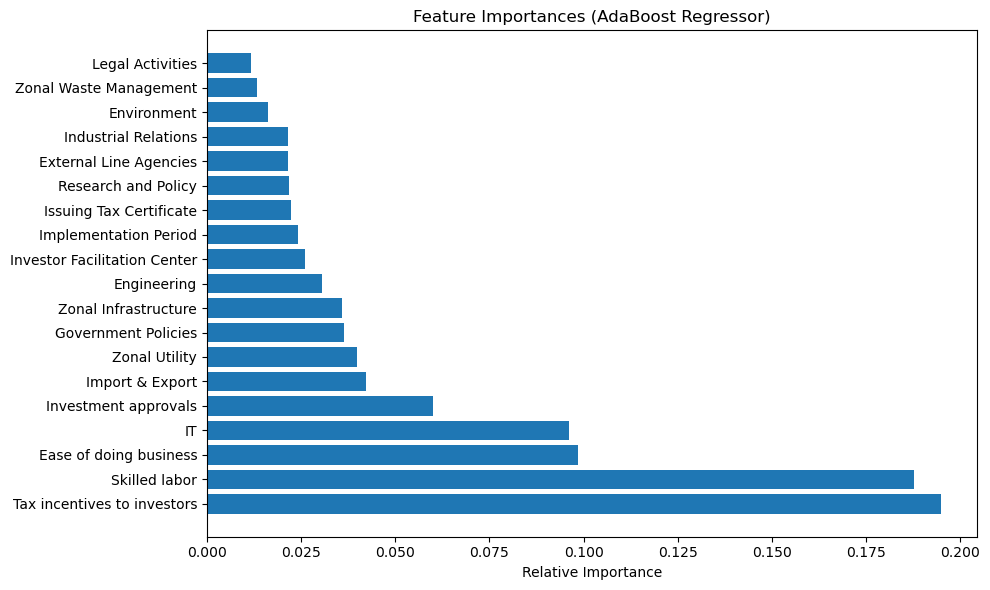

In [335]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor

# Fit the AdaBoost model (assuming it's already trained)
best_ada = AdaBoostRegressor(n_estimators=100, learning_rate=0.05, loss='square', random_state=42)
best_ada.fit(X_train, y_train)

# Get feature importances
importances = best_ada.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Convert X_train to a DataFrame if it is a numpy ndarray
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=selected_columns)

# Create a plot of feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (AdaBoost Regressor)")
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()


In [336]:
import joblib

# Save the trained AdaBoost model
joblib.dump(best_ada, 'C:\\Users\\DELL\\Desktop\\Research project\\app\\ada_model.pkl')



print("Model saved successfully!")
#cd "C:\Users\DELL\Desktop\Research project\app"
#streamlit run app.py


Model saved successfully!


In [339]:
import streamlit as st
import joblib
import pandas as pd

# Load the trained model
model = joblib.load('C:\\Users\\DELL\\Desktop\\Research project\\app\\ada_model.pkl')

# Set up the Streamlit page with title and custom background
st.set_page_config(page_title="Investor Satisfaction Predictor", layout="wide")
st.markdown("""
    <style>
        .reportview-container {
            background: #f4f7fa;
        }
        .sidebar .sidebar-content {
            background-color: #2a3b4c;
            color: white;
        }
        .stButton>button {
            background-color: #4CAF50;
            color: white;
            font-size: 16px;
            border-radius: 5px;
        }
    </style>
    """, unsafe_allow_html=True)

# Set title and description
st.title('Investor Satisfaction of ABC Investors')
st.markdown("""
    <div style="font-size:18px; color:#555;">Select the satisfaction on each ABC Department & External Agencies to predict the Investor Satisfaction out of 100</div>
""", unsafe_allow_html=True)

# Define ordinal features
ordinal_features = [
    'Investor Facilitation Center', 'Environment', 'Engineering',
       'Investment approvals', 'External Line Agencies', 'Legal Activities',
       'Implementation Period', 'Issuing Tax Certificate', 'Import & Export',
       'Industrial Relations', 'Research and Policy', 'IT',
       'Zonal Infrastructure', 'Zonal Utility', 'Zonal Waste Management',
       'Tax incentives to investors', 'Government Policies',
       'Ease of doing business', 'Skilled labor'
]

# Initialize session state only if it's not set
if "feature_values" not in st.session_state:
    st.session_state.feature_values = {feature: 3 for feature in ordinal_features}

# Sidebar for user input
st.sidebar.header('Adjust Department Satisfaction Levels')
for feature in ordinal_features:
    st.session_state.feature_values[feature] = st.sidebar.slider(
        feature, 3, 5, value=st.session_state.feature_values[feature], step=1
    )

# Add a button to predict and refresh the input
col1, col2 = st.columns([3, 1])

# Prediction button in the second column for better layout
with col2:
    if st.button('Predict'):
        # Convert session state values to a DataFrame
        input_data = pd.DataFrame([{feature: st.session_state.feature_values[feature] for feature in ordinal_features}])
        
        # Debugging step: Print the input data
        st.write("Input Data for Prediction:")
        st.write(input_data)
        
        # Make prediction
        predicted_satisfaction = model.predict(input_data)
        
        # Display prediction
        st.success(f'Predicted Satisfaction Score: {predicted_satisfaction[0]:.2f} out of 100')

    # Refresh button to reset all sliders
    if st.button("Refresh All Sliders"):
        st.session_state.feature_values = {feature: 3 for feature in ordinal_features}
        st.experimental_rerun()  # Refresh the page

# Optionally display more information
st.markdown("""
    <div style="font-size:14px; color:#777;">Note: Adjust the satisfaction level of each department or agency and click "Predict" to see the predicted satisfaction score for the investor.</div>
""", unsafe_allow_html=True)


DeltaGenerator()